In [20]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

Necessary imports

In [21]:
house_data = pd.read_csv("/train.csv")
house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


imported the csv file and checked if the file was uploaded

In [22]:
#scatter_matrix(house_data, figsize=(100,100))

made a scatter matrix for exploritory data analysis so i can see trends for all the data

In [23]:
year_prices = house_data[['LotArea','SalePrice']]
year_prices.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


made a data frame for lot area vs price so i can analyze the relationship between the those two variables

In [24]:
year_prices.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


used describe to see how the data is structured

In [25]:
year_prices.isnull().sum()

,0
LotArea,0
SalePrice,0


checked if there are any null values in these 2 columns

<Axes: xlabel='LotArea', ylabel='SalePrice'>

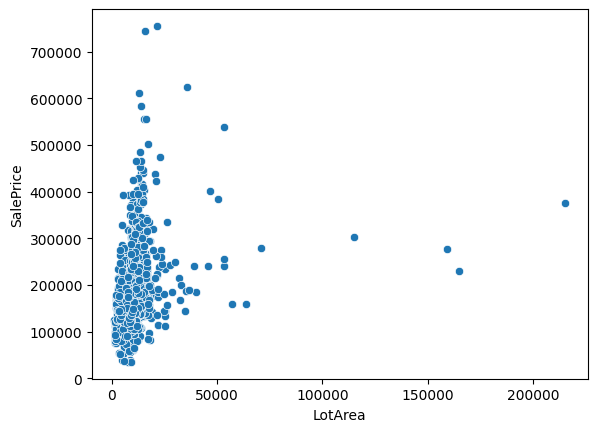

In [26]:
sns.scatterplot(data=year_prices, x='LotArea', y='SalePrice')

graph of lotArea vs salePrice

In [27]:
year_built = house_data[['YearBuilt','SalePrice']]
year_built.describe()


,YearBuilt,SalePrice
count,1460.000000,1460.000000
mean,1971.267808,180921.195890
std,30.202904,79442.502883
min,1872.000000,34900.000000
25%,1954.000000,129975.000000
50%,1973.000000,163000.000000
75%,2000.000000,214000.000000
max,2010.000000,755000.000000


made another dataFrame to check the year the house was built and its relation to the price of the house

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

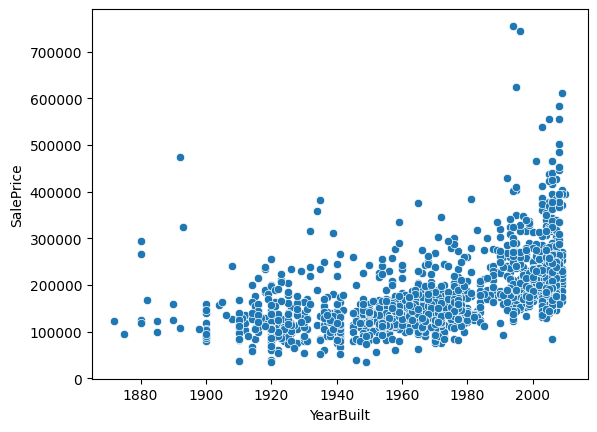

In [28]:
sns.scatterplot(data=year_built,x='YearBuilt',y='SalePrice')

graph of the year the house was built to the price of the house

In [29]:
year_built.isnull().sum()

,0
YearBuilt,0
SalePrice,0


In [30]:
year_sold = house_data[['YrSold','SalePrice']]
year_sold.describe()

,YrSold,SalePrice
count,1460.000000,1460.000000
mean,2007.815753,180921.195890
std,1.328095,79442.502883
min,2006.000000,34900.000000
25%,2007.000000,129975.000000
50%,2008.000000,163000.000000
75%,2009.000000,214000.000000
max,2010.000000,755000.000000


<Axes: xlabel='YrSold', ylabel='SalePrice'>

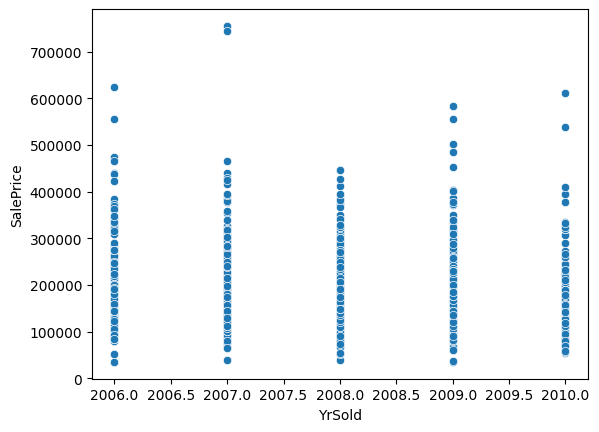

In [31]:
sns.scatterplot(data=year_sold,x='YrSold',y='SalePrice')

In [32]:
Gr_Area = house_data[['GrLivArea','SalePrice']]
Gr_Area.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


In [33]:
X = pd.DataFrame(Gr_Area['GrLivArea'])
y = pd.DataFrame(Gr_Area['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=1)

made a dataFrame for the ground living area and another one for the price of the house and then split the data into training data and testing data

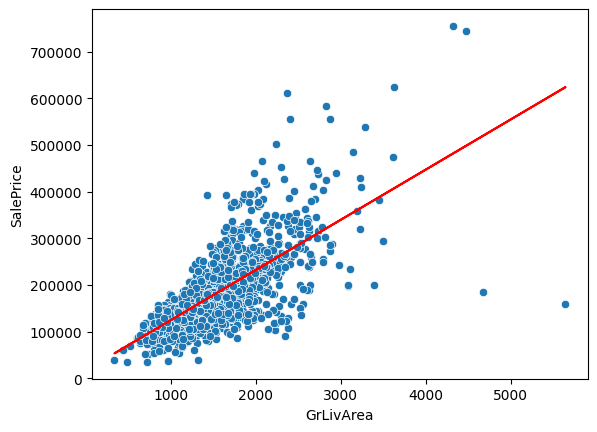

In [34]:
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
sns.scatterplot(data=Gr_Area,x='GrLivArea',y='SalePrice')
plt.plot(X_test,y_pred, color='red')


created a linear regression model that creates a line that predicts the price of the house based on the ground living area.

In [35]:
R2 = reg.score(X_test,y_test)
print(R2)

0.49735755256697656


since the R^2 value is around 0.5 it shows there is a correlation but there is a lot of variance in the data

In [36]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
print(mae)
print(rmse)

38185.09740762322
57062.90535917755


Since there is mean absolute error of around 38185 each prediction is about on avereage 38185 bigger or smaller than the predicted value.
Since the root mean squared error is so high that means there are some outliers that are dragging it up as outliers are penalized heart in root mean squared error